In [68]:
#importing necessary library 
import pandas as pd
from pathlib import Path
import csv
import numpy as np


In [4]:
# reading the whale_returns.csv file data
cwd = Path.cwd()
filepath = ('./whale_returns.csv')
whale_data = pd.read_csv(filepath,index_col = 'Date', parse_dates = True)

In [29]:
#inseting the data into a DataFrame
df_whale=pd.DataFrame(whale_data)
df_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
null = df_whale.isnull()

In [7]:
df_whale_cl = df_whale.dropna()

In [8]:
snp_data = pd.read_csv('sp_tsx_history.csv')

In [9]:
snp_data = pd.read_csv('sp_tsx_history.csv', index_col = 'Date', parse_dates = True)
snp_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
#putting the SNP data into a data frame
df_snp_data = pd.DataFrame(snp_data)
#df_snp_data.columns=["Date","Close"]


In [11]:
#converting string to number for the closing price by replacing $ and , with empty values and conveting the data to float
df_snp_data["Close"] = df_snp_data["Close"].str.replace("$","")
df_snp_data["Close"] = df_snp_data["Close"].str.replace(",","")
df_snp_data["Close"] = df_snp_data["Close"].astype("float")
#df_snp_data["Close"] = df_snp_data["Close"].astype("int")
#df_snp_data["Close"].str.isnumeric()
#df_snp_data.dtypes

C:\Users\muhas\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [12]:
df_snp_data["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [43]:
#df_snp_data.rename({"Close":"S&PTsx"})

In [13]:
#converting the closing price of the S&P data to % change and ignoring the NA values
df_snp_daily_returns = df_snp_data["Close"].pct_change().dropna()
df_snp_daily_returns

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1817, dtype: float64

In [14]:
std = df_snp_daily_returns.std()
std

0.006637362556692504

In [15]:
#reading the data from algo_returns.csv file and putting them in a data frame
algo_return = pd.read_csv('algo_returns.csv', index_col = 'Date', parse_dates = True)
df_algo_return =pd.DataFrame(algo_return)
df_algo_return

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [16]:
#combindin gthe protfolios in s single data frame 
combined_data = pd.concat([df_whale_cl,df_snp_daily_returns,df_algo_return], axis='columns',join='inner')
#Shortening the names of the colums of the portfolios
combined_data.columns=["SOROS",
                       "PAULSON",
                       "TIGER",
                       "BERKSHIRE",
                       "S&P",
                       "Algo 1",
                       "Algo 2"]

combined_data.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,S&P,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303


<AxesSubplot:xlabel='Date'>

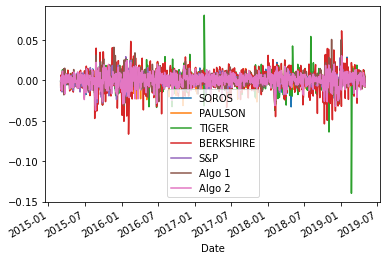

In [83]:
#polting the daily redun of the portfolios in a graph
combined_data.plot()

In [17]:
#Determining the cumulative return of the protfolios
cumulative_returns = (1+combined_data).cumprod()
cumulative_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,S&P,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.991470,0.998058,0.999051
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.988128,0.989486,1.001464
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.989456,0.988541,1.005794
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.979589,0.983641,0.994267
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.973168,0.978283,0.995563


<AxesSubplot:>

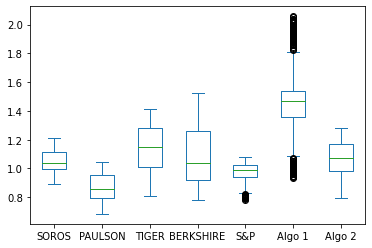

In [18]:
#plotting the cumulative returns in box graph 
cumulative_returns.plot.box()

In [19]:
std_port = combined_data.std()

In [20]:
#sorting the values of the portfolios from high risk to low risk
risky_port = std_port.sort_values(ascending=False)
risky_port.head()

BERKSHIRE    0.012826
TIGER        0.010883
Algo 2       0.008326
SOROS        0.007828
Algo 1       0.007589
dtype: float64

In [21]:
#finding the anual standard deviation from daily standard defiation 
annual_std = risky_port * np.sqrt(252)
annual_std.head()

BERKSHIRE    0.203599
TIGER        0.172759
Algo 2       0.132177
SOROS        0.124259
Algo 1       0.120470
dtype: float64

<AxesSubplot:xlabel='Date'>

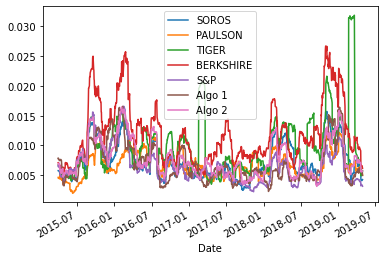

In [22]:
#calculating and plotting the rolling standard deviation 
combined_data.rolling(window=21).std().plot()

In [23]:
#Finding the covariances of the portfolios with market portfolios (s&P)
soros_covariance=combined_data["SOROS"].cov(combined_data["S&P"] )    
paulson_covariance=combined_data["PAULSON"].cov(combined_data["S&P"] )    
berkshire_covariance=combined_data["BERKSHIRE"].cov(combined_data["S&P"] )
algo1_covariance=combined_data["Algo 1"].cov(combined_data["S&P"] )
algo2_covariance=combined_data["Algo 2"].cov(combined_data["S&P"] )
algo2_covariance

4.3187044300842554e-05

In [25]:
#Finding the sharp ratios to determine the performance in camparison with risk
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS        0.286709
PAULSON     -0.547594
TIGER       -0.144455
BERKSHIRE    0.467045
S&P          0.195550
Algo 1       1.491514
Algo 2       0.396817
dtype: float64

<AxesSubplot:>

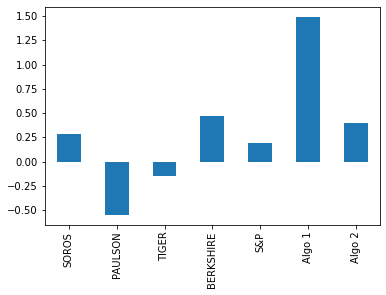

In [28]:
#Plotting the sharp ratios in bar chart 
sharpe_ratios.plot(kind = 'bar')

In [46]:
df_sharp = pd.DataFrame(sharpe_ratios)
df_sharp

,0
SOROS,0.286709
PAULSON,-0.547594
TIGER,-0.144455
BERKSHIRE,0.467045
S&P,0.195550
Algo 1,1.491514
Algo 2,0.396817


In [54]:
print("BERKSHIRE and SOROS portfolio is doing better than S&P")

BERKSHIRE and SOROS portfolio is doing better than S&P


In [100]:
filepath_IBM = ('./IBM - Sheet1.csv')
IBM_data = pd.read_csv(filepath_IBM,index_col = 'Date', parse_dates = True)
IBM_data.columns=['IBM']
IBM_data.pct_change()

,IBM
Date,
2014-01-02 16:00:00,NaN
2014-01-03 16:00:00,0.005982
2014-01-06 16:00:00,-0.003422
2014-01-07 16:00:00,0.019926
2014-01-08 16:00:00,-0.009161
...,...
2014-12-23 16:00:00,0.004994
2014-12-24 16:00:00,-0.002646
2014-12-26 16:00:00,0.003235


In [103]:
filepath_BPL = ('./BPL - Sheet1.csv')
BPL_data=pd.read_csv(filepath_BPL, index_col="Date", parse_dates =True)
BPL_data.columns=["BPL"]
BPL_data.pct_change()

,BPL
Date,
2014-01-02 15:30:00,NaN
2014-01-03 15:30:00,-0.054313
2014-01-06 15:30:00,0.010135
2014-01-07 15:30:00,0.030100
2014-01-08 15:30:00,-0.006494
...,...
2014-12-24 15:30:00,0.136476
2014-12-26 15:30:00,0.039301
2014-12-29 15:30:00,0.199580


In [106]:
combined_data1=pd.concat([combined_data,BPL_data,IBM_data],axis='columns',join='inner')
combined_data1

,SOROS,PAULSON,TIGER,BERKSHIRE,S&P,Algo 1,Algo 2,BPL,IBM
Date,,,,,,,,,
